# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

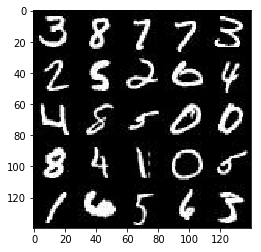

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

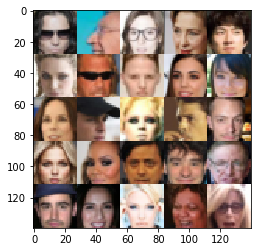

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/tia/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(tf.float32, shape=(None,image_width,image_height,image_channels), name='inputs')
    z = tf.placeholder(tf.float32, shape=(None,z_dim), name='z')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    return inputs, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    # Hyperparameters
    alpha = 0.2  
    h1_filters = 128
    h2_filters = 256
    h3_filters = 512
    
    #build model
    with tf.variable_scope('discriminator', reuse=reuse):
        #images_channel = images.get_shape().as_list()[3]
        h1 = tf.layers.conv2d(images, h1_filters, 5, strides=2, padding='same')
        h1 = tf.maximum(alpha * h1, h1)
        #now 14 x 14 x 128
        
        h2 = tf.layers.conv2d(h1, h2_filters, 5, strides=2, padding='same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        #now 7 x 7 x 256
        
        h3 = tf.layers.conv2d(h2, h3_filters, 3, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        #now 4 x 4 x 512
        
        
        flat = tf.reshape(h3, (-1, 4 * 4 * h3_filters))
        
        logits = tf.layers.dense(flat,1)
        out = tf.nn.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    # Hyperparameters
    alpha = 0.2  
    h1_filters = 512
    h2_filters = 256
    h3_filters = 128
    
    #build model
    with tf.variable_scope('generator', reuse=not is_train):
        h1 = tf.layers.dense(z, 3 * 3 * h1_filters)
        h1 = tf.reshape(h1, (-1, 3, 3, h1_filters))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
        #now 3 x 3 x 512
        
        h2 = tf.layers.conv2d_transpose(h1, h2_filters, 3, strides=2, padding='valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
        #now 7 x 7 x 256
        
        h3 = tf.layers.conv2d_transpose(h2, h3_filters, 5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
        #now 14 x 14 x 128
        
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, strides=2, padding='same')
        image = tf.nn.tanh(logits)
        return image


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Hyperparameters
    smooth = 0.1
    
    out_real, logits_real = discriminator(input_real)
    
    image_fake = generator(input_z, out_channel_dim, is_train=True)
    
    out_fake, logits_fake = discriminator(image_fake, reuse=True)
    
    d_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(logits_real) * (1 - smooth), 
                                                     logits=logits_real))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(logits_fake),
                                                          logits=logits_fake))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(logits_fake),
                                                          logits=logits_fake))
    
    return d_loss + d_loss_fake, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()

    steps = 0
        
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4679... Generator Loss: 17.6488
Epoch 1/2... Discriminator Loss: 0.5150... Generator Loss: 3.4328
Epoch 1/2... Discriminator Loss: 3.9870... Generator Loss: 0.2025
Epoch 1/2... Discriminator Loss: 1.0990... Generator Loss: 1.2748
Epoch 1/2... Discriminator Loss: 0.8725... Generator Loss: 5.8056
Epoch 1/2... Discriminator Loss: 0.3855... Generator Loss: 4.0945
Epoch 1/2... Discriminator Loss: 3.6654... Generator Loss: 0.2269
Epoch 1/2... Discriminator Loss: 0.6718... Generator Loss: 1.6892
Epoch 1/2... Discriminator Loss: 0.7043... Generator Loss: 3.0587
Epoch 1/2... Discriminator Loss: 0.6455... Generator Loss: 2.9714


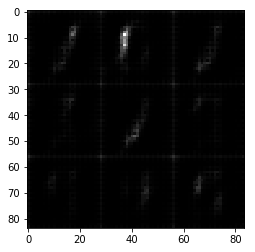

Epoch 1/2... Discriminator Loss: 0.5333... Generator Loss: 2.4018
Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 0.9985
Epoch 1/2... Discriminator Loss: 0.5791... Generator Loss: 2.5653
Epoch 1/2... Discriminator Loss: 1.4390... Generator Loss: 0.5741
Epoch 1/2... Discriminator Loss: 0.7749... Generator Loss: 2.2877
Epoch 1/2... Discriminator Loss: 0.8661... Generator Loss: 1.9787
Epoch 1/2... Discriminator Loss: 0.8298... Generator Loss: 1.8305
Epoch 1/2... Discriminator Loss: 1.2049... Generator Loss: 2.9591
Epoch 1/2... Discriminator Loss: 0.8455... Generator Loss: 2.4155
Epoch 1/2... Discriminator Loss: 0.8982... Generator Loss: 2.2336


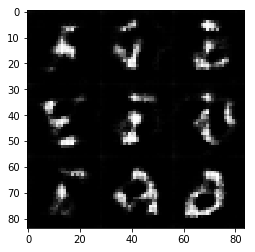

Epoch 1/2... Discriminator Loss: 1.1317... Generator Loss: 0.7675
Epoch 1/2... Discriminator Loss: 0.9225... Generator Loss: 1.8423
Epoch 1/2... Discriminator Loss: 1.0567... Generator Loss: 0.9374
Epoch 1/2... Discriminator Loss: 1.0722... Generator Loss: 1.8703
Epoch 1/2... Discriminator Loss: 0.9227... Generator Loss: 1.0613
Epoch 1/2... Discriminator Loss: 0.9261... Generator Loss: 2.1362
Epoch 1/2... Discriminator Loss: 0.8620... Generator Loss: 1.2865
Epoch 1/2... Discriminator Loss: 0.9298... Generator Loss: 2.0641
Epoch 1/2... Discriminator Loss: 0.7872... Generator Loss: 1.7743
Epoch 1/2... Discriminator Loss: 1.3197... Generator Loss: 2.8958


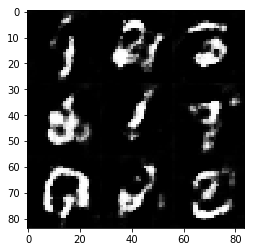

Epoch 1/2... Discriminator Loss: 1.0351... Generator Loss: 0.9726
Epoch 1/2... Discriminator Loss: 0.9579... Generator Loss: 1.8961
Epoch 1/2... Discriminator Loss: 0.9275... Generator Loss: 1.0691
Epoch 1/2... Discriminator Loss: 0.8595... Generator Loss: 1.3039
Epoch 1/2... Discriminator Loss: 1.1096... Generator Loss: 0.7769
Epoch 1/2... Discriminator Loss: 0.9365... Generator Loss: 1.9362
Epoch 1/2... Discriminator Loss: 0.8500... Generator Loss: 1.7646
Epoch 1/2... Discriminator Loss: 0.8494... Generator Loss: 1.4761
Epoch 1/2... Discriminator Loss: 0.9873... Generator Loss: 1.9605
Epoch 1/2... Discriminator Loss: 0.9277... Generator Loss: 1.4032


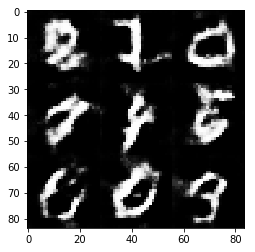

Epoch 1/2... Discriminator Loss: 0.9172... Generator Loss: 1.7577
Epoch 1/2... Discriminator Loss: 0.9166... Generator Loss: 1.0645
Epoch 1/2... Discriminator Loss: 1.2811... Generator Loss: 0.6481
Epoch 1/2... Discriminator Loss: 1.0986... Generator Loss: 0.7909
Epoch 1/2... Discriminator Loss: 0.8961... Generator Loss: 1.6491
Epoch 1/2... Discriminator Loss: 0.9976... Generator Loss: 0.9212
Epoch 2/2... Discriminator Loss: 1.0335... Generator Loss: 0.9746
Epoch 2/2... Discriminator Loss: 1.1531... Generator Loss: 2.5038
Epoch 2/2... Discriminator Loss: 0.8947... Generator Loss: 1.9459
Epoch 2/2... Discriminator Loss: 0.9611... Generator Loss: 1.5025


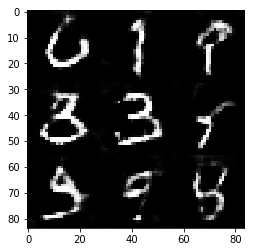

Epoch 2/2... Discriminator Loss: 0.9308... Generator Loss: 1.0525
Epoch 2/2... Discriminator Loss: 1.0798... Generator Loss: 0.8443
Epoch 2/2... Discriminator Loss: 0.9071... Generator Loss: 1.2418
Epoch 2/2... Discriminator Loss: 1.0810... Generator Loss: 0.8791
Epoch 2/2... Discriminator Loss: 0.8882... Generator Loss: 1.1134
Epoch 2/2... Discriminator Loss: 0.9744... Generator Loss: 1.4302
Epoch 2/2... Discriminator Loss: 1.0058... Generator Loss: 1.0174
Epoch 2/2... Discriminator Loss: 1.1758... Generator Loss: 2.1655
Epoch 2/2... Discriminator Loss: 0.9056... Generator Loss: 1.6430
Epoch 2/2... Discriminator Loss: 1.0858... Generator Loss: 2.2909


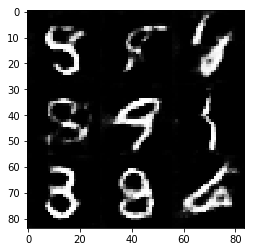

Epoch 2/2... Discriminator Loss: 1.5109... Generator Loss: 0.4618
Epoch 2/2... Discriminator Loss: 0.9522... Generator Loss: 1.4300
Epoch 2/2... Discriminator Loss: 0.8387... Generator Loss: 1.4863
Epoch 2/2... Discriminator Loss: 1.0328... Generator Loss: 2.4023
Epoch 2/2... Discriminator Loss: 0.8719... Generator Loss: 1.5379
Epoch 2/2... Discriminator Loss: 0.9082... Generator Loss: 1.6406
Epoch 2/2... Discriminator Loss: 1.1368... Generator Loss: 2.1928
Epoch 2/2... Discriminator Loss: 0.8005... Generator Loss: 1.5544
Epoch 2/2... Discriminator Loss: 1.0091... Generator Loss: 2.2818
Epoch 2/2... Discriminator Loss: 1.0246... Generator Loss: 0.8987


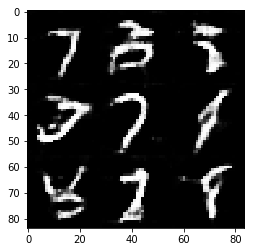

Epoch 2/2... Discriminator Loss: 1.0703... Generator Loss: 2.1482
Epoch 2/2... Discriminator Loss: 1.0584... Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 1.2049... Generator Loss: 1.9679
Epoch 2/2... Discriminator Loss: 2.6571... Generator Loss: 3.5797
Epoch 2/2... Discriminator Loss: 1.0421... Generator Loss: 1.2193
Epoch 2/2... Discriminator Loss: 0.9418... Generator Loss: 1.1812
Epoch 2/2... Discriminator Loss: 0.8737... Generator Loss: 1.2906
Epoch 2/2... Discriminator Loss: 0.8684... Generator Loss: 1.0806
Epoch 2/2... Discriminator Loss: 1.3844... Generator Loss: 1.4729
Epoch 2/2... Discriminator Loss: 1.3250... Generator Loss: 2.1913


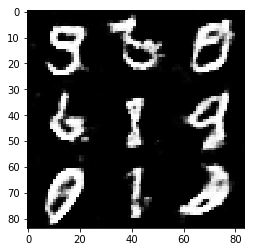

Epoch 2/2... Discriminator Loss: 0.9596... Generator Loss: 1.1111
Epoch 2/2... Discriminator Loss: 1.0665... Generator Loss: 1.5719
Epoch 2/2... Discriminator Loss: 1.1146... Generator Loss: 2.2614
Epoch 2/2... Discriminator Loss: 0.8184... Generator Loss: 1.8704
Epoch 2/2... Discriminator Loss: 0.9126... Generator Loss: 0.9724
Epoch 2/2... Discriminator Loss: 0.9237... Generator Loss: 1.3066
Epoch 2/2... Discriminator Loss: 0.9095... Generator Loss: 1.2060
Epoch 2/2... Discriminator Loss: 0.7840... Generator Loss: 1.3368
Epoch 2/2... Discriminator Loss: 1.0773... Generator Loss: 1.5396
Epoch 2/2... Discriminator Loss: 0.9941... Generator Loss: 1.0914


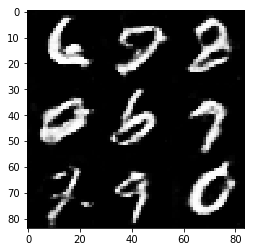

Epoch 2/2... Discriminator Loss: 1.5864... Generator Loss: 0.4814
Epoch 2/2... Discriminator Loss: 0.9517... Generator Loss: 1.0330
Epoch 2/2... Discriminator Loss: 0.9768... Generator Loss: 2.0130


In [12]:
batch_size = 128
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/5... Discriminator Loss: 0.6485... Generator Loss: 1.8522
Epoch 1/5... Discriminator Loss: 0.5041... Generator Loss: 2.6244
Epoch 1/5... Discriminator Loss: 0.3829... Generator Loss: 6.0077
Epoch 1/5... Discriminator Loss: 0.4663... Generator Loss: 7.8173
Epoch 1/5... Discriminator Loss: 1.1452... Generator Loss: 10.8067
Epoch 1/5... Discriminator Loss: 0.5909... Generator Loss: 3.0360
Epoch 1/5... Discriminator Loss: 0.5850... Generator Loss: 3.7948
Epoch 1/5... Discriminator Loss: 0.5186... Generator Loss: 2.3924
Epoch 1/5... Discriminator Loss: 0.4830... Generator Loss: 2.6600
Epoch 1/5... Discriminator Loss: 0.4522... Generator Loss: 2.6927


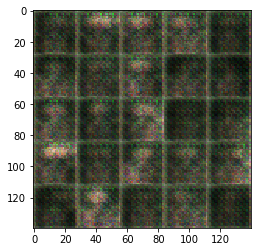

Epoch 1/5... Discriminator Loss: 0.5237... Generator Loss: 2.1610
Epoch 1/5... Discriminator Loss: 0.4307... Generator Loss: 3.0899
Epoch 1/5... Discriminator Loss: 0.5999... Generator Loss: 1.6946
Epoch 1/5... Discriminator Loss: 1.2067... Generator Loss: 7.5001
Epoch 1/5... Discriminator Loss: 0.5366... Generator Loss: 3.0632
Epoch 1/5... Discriminator Loss: 0.7992... Generator Loss: 1.1495
Epoch 1/5... Discriminator Loss: 0.9296... Generator Loss: 1.0065
Epoch 1/5... Discriminator Loss: 0.8870... Generator Loss: 1.1193
Epoch 1/5... Discriminator Loss: 0.6087... Generator Loss: 1.7052
Epoch 1/5... Discriminator Loss: 0.5716... Generator Loss: 2.0498


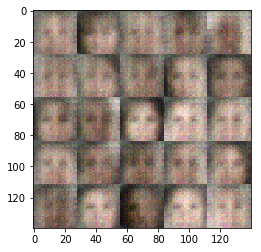

Epoch 1/5... Discriminator Loss: 1.7670... Generator Loss: 0.3526
Epoch 1/5... Discriminator Loss: 0.4904... Generator Loss: 3.2723
Epoch 1/5... Discriminator Loss: 0.8900... Generator Loss: 2.0894
Epoch 1/5... Discriminator Loss: 0.8046... Generator Loss: 1.5201
Epoch 1/5... Discriminator Loss: 1.5044... Generator Loss: 1.1817
Epoch 1/5... Discriminator Loss: 2.0388... Generator Loss: 8.9848
Epoch 1/5... Discriminator Loss: 0.6887... Generator Loss: 1.7246
Epoch 1/5... Discriminator Loss: 0.9701... Generator Loss: 3.7227
Epoch 1/5... Discriminator Loss: 0.7519... Generator Loss: 2.5994
Epoch 1/5... Discriminator Loss: 0.5079... Generator Loss: 4.8098


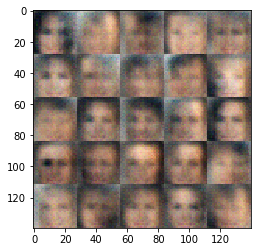

Epoch 1/5... Discriminator Loss: 0.7945... Generator Loss: 1.2927
Epoch 1/5... Discriminator Loss: 0.6970... Generator Loss: 3.9143
Epoch 1/5... Discriminator Loss: 0.5480... Generator Loss: 2.7557
Epoch 1/5... Discriminator Loss: 0.4684... Generator Loss: 2.8244
Epoch 1/5... Discriminator Loss: 0.4142... Generator Loss: 3.8522
Epoch 1/5... Discriminator Loss: 0.4472... Generator Loss: 3.0237
Epoch 1/5... Discriminator Loss: 0.5447... Generator Loss: 4.6455
Epoch 1/5... Discriminator Loss: 0.4196... Generator Loss: 3.9129
Epoch 1/5... Discriminator Loss: 0.6182... Generator Loss: 1.8174
Epoch 1/5... Discriminator Loss: 0.6177... Generator Loss: 1.5820


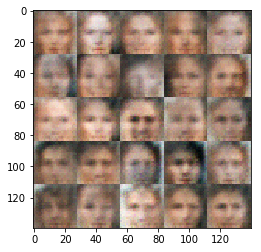

Epoch 1/5... Discriminator Loss: 1.7198... Generator Loss: 0.4211
Epoch 1/5... Discriminator Loss: 0.6572... Generator Loss: 1.5641
Epoch 1/5... Discriminator Loss: 0.4540... Generator Loss: 3.0780
Epoch 1/5... Discriminator Loss: 0.6882... Generator Loss: 1.6954
Epoch 1/5... Discriminator Loss: 0.6350... Generator Loss: 2.2693
Epoch 1/5... Discriminator Loss: 0.4519... Generator Loss: 2.7148
Epoch 1/5... Discriminator Loss: 0.5033... Generator Loss: 2.4223
Epoch 1/5... Discriminator Loss: 0.4377... Generator Loss: 3.5854
Epoch 1/5... Discriminator Loss: 0.3792... Generator Loss: 6.9005
Epoch 1/5... Discriminator Loss: 0.5230... Generator Loss: 2.3952


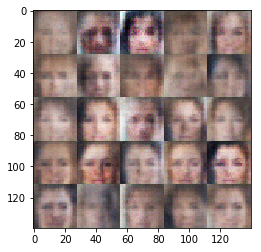

Epoch 1/5... Discriminator Loss: 0.8778... Generator Loss: 6.6458
Epoch 1/5... Discriminator Loss: 0.4250... Generator Loss: 3.4451
Epoch 1/5... Discriminator Loss: 0.5814... Generator Loss: 1.8048
Epoch 1/5... Discriminator Loss: 0.6557... Generator Loss: 1.8902
Epoch 1/5... Discriminator Loss: 0.4213... Generator Loss: 5.4690
Epoch 1/5... Discriminator Loss: 0.6537... Generator Loss: 1.6820
Epoch 1/5... Discriminator Loss: 0.6967... Generator Loss: 3.4087
Epoch 1/5... Discriminator Loss: 0.4134... Generator Loss: 3.2478
Epoch 1/5... Discriminator Loss: 0.4577... Generator Loss: 6.2886
Epoch 1/5... Discriminator Loss: 0.7595... Generator Loss: 1.2488


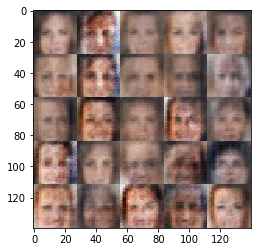

Epoch 1/5... Discriminator Loss: 0.3809... Generator Loss: 4.2104
Epoch 1/5... Discriminator Loss: 0.4850... Generator Loss: 2.3913
Epoch 1/5... Discriminator Loss: 0.3840... Generator Loss: 6.7385
Epoch 1/5... Discriminator Loss: 0.3724... Generator Loss: 5.4450
Epoch 1/5... Discriminator Loss: 0.5627... Generator Loss: 1.8961
Epoch 1/5... Discriminator Loss: 1.0419... Generator Loss: 0.8860
Epoch 1/5... Discriminator Loss: 0.4302... Generator Loss: 3.1733
Epoch 1/5... Discriminator Loss: 0.5752... Generator Loss: 1.9173
Epoch 1/5... Discriminator Loss: 0.4187... Generator Loss: 4.0807
Epoch 1/5... Discriminator Loss: 0.5479... Generator Loss: 8.7781


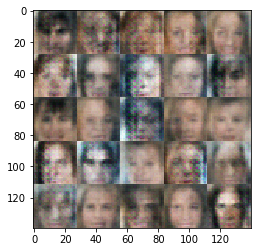

Epoch 1/5... Discriminator Loss: 0.4515... Generator Loss: 2.7927
Epoch 1/5... Discriminator Loss: 0.3662... Generator Loss: 7.8708
Epoch 1/5... Discriminator Loss: 0.8404... Generator Loss: 4.1208
Epoch 1/5... Discriminator Loss: 0.4818... Generator Loss: 6.3236
Epoch 1/5... Discriminator Loss: 0.3508... Generator Loss: 6.3920
Epoch 1/5... Discriminator Loss: 0.7365... Generator Loss: 1.3271
Epoch 1/5... Discriminator Loss: 0.5121... Generator Loss: 4.2133
Epoch 1/5... Discriminator Loss: 0.3564... Generator Loss: 5.1151
Epoch 1/5... Discriminator Loss: 0.3619... Generator Loss: 8.6403
Epoch 1/5... Discriminator Loss: 0.3853... Generator Loss: 3.4853


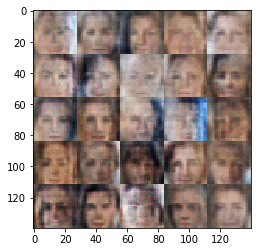

Epoch 1/5... Discriminator Loss: 0.3471... Generator Loss: 6.5128
Epoch 1/5... Discriminator Loss: 1.4733... Generator Loss: 10.4252
Epoch 1/5... Discriminator Loss: 0.3968... Generator Loss: 4.6071
Epoch 1/5... Discriminator Loss: 0.3459... Generator Loss: 7.8237
Epoch 1/5... Discriminator Loss: 0.5219... Generator Loss: 1.9440
Epoch 1/5... Discriminator Loss: 0.3436... Generator Loss: 10.0636
Epoch 1/5... Discriminator Loss: 0.3821... Generator Loss: 5.9725
Epoch 1/5... Discriminator Loss: 0.5344... Generator Loss: 1.8842
Epoch 1/5... Discriminator Loss: 0.3596... Generator Loss: 4.3289
Epoch 1/5... Discriminator Loss: 0.3939... Generator Loss: 3.5294


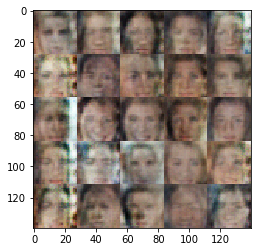

Epoch 1/5... Discriminator Loss: 0.3438... Generator Loss: 7.7710
Epoch 1/5... Discriminator Loss: 0.3490... Generator Loss: 8.0566
Epoch 1/5... Discriminator Loss: 0.4056... Generator Loss: 2.9446
Epoch 1/5... Discriminator Loss: 0.3450... Generator Loss: 7.0937
Epoch 1/5... Discriminator Loss: 0.5804... Generator Loss: 2.1247
Epoch 1/5... Discriminator Loss: 0.6967... Generator Loss: 2.8826
Epoch 1/5... Discriminator Loss: 0.3926... Generator Loss: 3.7509
Epoch 1/5... Discriminator Loss: 0.3767... Generator Loss: 3.8982
Epoch 1/5... Discriminator Loss: 0.3733... Generator Loss: 5.2933
Epoch 1/5... Discriminator Loss: 0.4886... Generator Loss: 8.2633


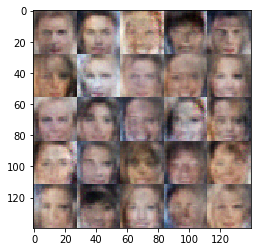

Epoch 1/5... Discriminator Loss: 0.3521... Generator Loss: 6.1979
Epoch 1/5... Discriminator Loss: 0.3551... Generator Loss: 7.8484
Epoch 1/5... Discriminator Loss: 0.3471... Generator Loss: 7.9801
Epoch 1/5... Discriminator Loss: 0.5127... Generator Loss: 3.1047
Epoch 1/5... Discriminator Loss: 0.3518... Generator Loss: 4.8218
Epoch 1/5... Discriminator Loss: 0.3639... Generator Loss: 4.2481
Epoch 1/5... Discriminator Loss: 0.4833... Generator Loss: 3.9094
Epoch 1/5... Discriminator Loss: 0.4508... Generator Loss: 2.9067
Epoch 1/5... Discriminator Loss: 0.8268... Generator Loss: 1.1848
Epoch 1/5... Discriminator Loss: 0.5691... Generator Loss: 1.9232


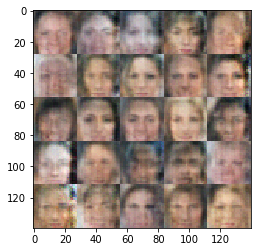

Epoch 1/5... Discriminator Loss: 0.9354... Generator Loss: 0.9245
Epoch 1/5... Discriminator Loss: 0.3591... Generator Loss: 7.0852
Epoch 1/5... Discriminator Loss: 0.8560... Generator Loss: 7.7587
Epoch 1/5... Discriminator Loss: 0.3550... Generator Loss: 4.8512
Epoch 1/5... Discriminator Loss: 0.3603... Generator Loss: 10.3347
Epoch 1/5... Discriminator Loss: 0.3385... Generator Loss: 10.3276
Epoch 1/5... Discriminator Loss: 0.3367... Generator Loss: 8.3609
Epoch 1/5... Discriminator Loss: 0.3562... Generator Loss: 4.6258
Epoch 1/5... Discriminator Loss: 0.3975... Generator Loss: 3.3870
Epoch 1/5... Discriminator Loss: 0.3525... Generator Loss: 6.3189


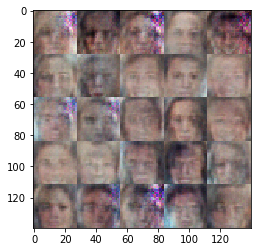

Epoch 1/5... Discriminator Loss: 0.3374... Generator Loss: 9.2037
Epoch 1/5... Discriminator Loss: 0.3482... Generator Loss: 8.9786
Epoch 1/5... Discriminator Loss: 0.3392... Generator Loss: 6.6693
Epoch 1/5... Discriminator Loss: 0.3416... Generator Loss: 7.4843
Epoch 1/5... Discriminator Loss: 0.3763... Generator Loss: 3.9208
Epoch 1/5... Discriminator Loss: 0.3383... Generator Loss: 7.0864
Epoch 1/5... Discriminator Loss: 0.3430... Generator Loss: 7.1028
Epoch 1/5... Discriminator Loss: 0.3527... Generator Loss: 4.9006
Epoch 1/5... Discriminator Loss: 0.3529... Generator Loss: 4.4246
Epoch 1/5... Discriminator Loss: 0.3660... Generator Loss: 3.9984


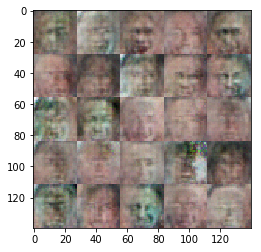

Epoch 1/5... Discriminator Loss: 0.3424... Generator Loss: 6.4925
Epoch 1/5... Discriminator Loss: 0.4595... Generator Loss: 2.2955
Epoch 1/5... Discriminator Loss: 0.3483... Generator Loss: 5.2945
Epoch 1/5... Discriminator Loss: 0.3464... Generator Loss: 5.6619
Epoch 1/5... Discriminator Loss: 0.3641... Generator Loss: 5.0773
Epoch 1/5... Discriminator Loss: 0.3393... Generator Loss: 8.9551
Epoch 1/5... Discriminator Loss: 0.5458... Generator Loss: 2.1431
Epoch 1/5... Discriminator Loss: 0.3821... Generator Loss: 7.3690
Epoch 1/5... Discriminator Loss: 0.4863... Generator Loss: 2.2211
Epoch 1/5... Discriminator Loss: 1.3377... Generator Loss: 0.6525


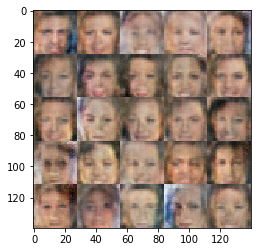

Epoch 1/5... Discriminator Loss: 0.3931... Generator Loss: 4.4059
Epoch 1/5... Discriminator Loss: 0.5107... Generator Loss: 8.6229
Epoch 1/5... Discriminator Loss: 0.4222... Generator Loss: 4.3195
Epoch 1/5... Discriminator Loss: 0.3907... Generator Loss: 3.8771
Epoch 1/5... Discriminator Loss: 0.4578... Generator Loss: 4.8069
Epoch 1/5... Discriminator Loss: 0.3774... Generator Loss: 7.9613
Epoch 1/5... Discriminator Loss: 0.3404... Generator Loss: 6.8168
Epoch 1/5... Discriminator Loss: 0.3448... Generator Loss: 8.5287
Epoch 1/5... Discriminator Loss: 0.3732... Generator Loss: 10.2956
Epoch 1/5... Discriminator Loss: 0.3815... Generator Loss: 8.7221


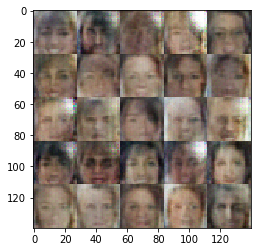

Epoch 1/5... Discriminator Loss: 0.3804... Generator Loss: 3.6582
Epoch 1/5... Discriminator Loss: 0.3363... Generator Loss: 9.5127
Epoch 1/5... Discriminator Loss: 0.3595... Generator Loss: 10.0065
Epoch 1/5... Discriminator Loss: 0.3367... Generator Loss: 7.0699
Epoch 1/5... Discriminator Loss: 0.3347... Generator Loss: 8.4749
Epoch 1/5... Discriminator Loss: 0.3732... Generator Loss: 3.4104
Epoch 1/5... Discriminator Loss: 0.3360... Generator Loss: 6.6633
Epoch 1/5... Discriminator Loss: 0.3986... Generator Loss: 3.0004
Epoch 2/5... Discriminator Loss: 0.3345... Generator Loss: 10.5186
Epoch 2/5... Discriminator Loss: 0.3372... Generator Loss: 6.1145


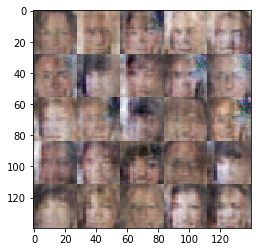

Epoch 2/5... Discriminator Loss: 0.3345... Generator Loss: 7.6403
Epoch 2/5... Discriminator Loss: 0.4227... Generator Loss: 2.6211
Epoch 2/5... Discriminator Loss: 0.3350... Generator Loss: 6.7843
Epoch 2/5... Discriminator Loss: 0.3452... Generator Loss: 5.1498
Epoch 2/5... Discriminator Loss: 0.3347... Generator Loss: 7.1130
Epoch 2/5... Discriminator Loss: 0.3349... Generator Loss: 9.4795
Epoch 2/5... Discriminator Loss: 0.3604... Generator Loss: 3.9134
Epoch 2/5... Discriminator Loss: 0.3351... Generator Loss: 6.1392
Epoch 2/5... Discriminator Loss: 0.3918... Generator Loss: 3.0818
Epoch 2/5... Discriminator Loss: 0.3336... Generator Loss: 6.8623


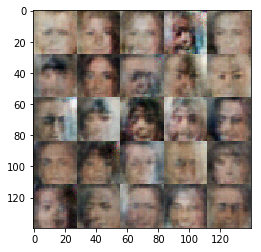

Epoch 2/5... Discriminator Loss: 0.3846... Generator Loss: 3.1568
Epoch 2/5... Discriminator Loss: 0.3555... Generator Loss: 4.4737
Epoch 2/5... Discriminator Loss: 0.3428... Generator Loss: 5.1648
Epoch 2/5... Discriminator Loss: 0.3605... Generator Loss: 3.6243
Epoch 2/5... Discriminator Loss: 0.3850... Generator Loss: 4.2409
Epoch 2/5... Discriminator Loss: 0.3595... Generator Loss: 9.4872
Epoch 2/5... Discriminator Loss: 4.5568... Generator Loss: 7.0344
Epoch 2/5... Discriminator Loss: 0.3944... Generator Loss: 4.4543
Epoch 2/5... Discriminator Loss: 0.9953... Generator Loss: 1.1464
Epoch 2/5... Discriminator Loss: 1.0113... Generator Loss: 1.0029


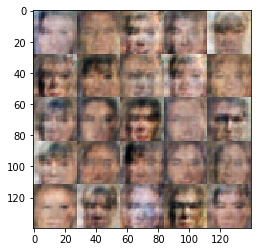

Epoch 2/5... Discriminator Loss: 0.7084... Generator Loss: 2.0490
Epoch 2/5... Discriminator Loss: 0.4814... Generator Loss: 4.1304
Epoch 2/5... Discriminator Loss: 0.7114... Generator Loss: 2.1038
Epoch 2/5... Discriminator Loss: 1.0454... Generator Loss: 0.8008
Epoch 2/5... Discriminator Loss: 0.3620... Generator Loss: 5.4281
Epoch 2/5... Discriminator Loss: 0.4604... Generator Loss: 2.6885
Epoch 2/5... Discriminator Loss: 0.8022... Generator Loss: 5.9448
Epoch 2/5... Discriminator Loss: 0.3953... Generator Loss: 3.5518
Epoch 2/5... Discriminator Loss: 0.4905... Generator Loss: 2.5594
Epoch 2/5... Discriminator Loss: 0.4311... Generator Loss: 2.5677


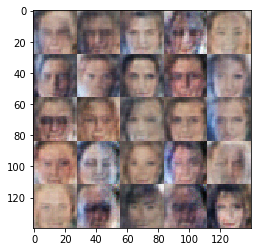

Epoch 2/5... Discriminator Loss: 0.3752... Generator Loss: 3.8651
Epoch 2/5... Discriminator Loss: 0.6044... Generator Loss: 1.6163
Epoch 2/5... Discriminator Loss: 0.3399... Generator Loss: 7.4169
Epoch 2/5... Discriminator Loss: 0.4145... Generator Loss: 2.8305
Epoch 2/5... Discriminator Loss: 0.3801... Generator Loss: 3.8208
Epoch 2/5... Discriminator Loss: 0.3361... Generator Loss: 7.5908
Epoch 2/5... Discriminator Loss: 0.3728... Generator Loss: 5.2716
Epoch 2/5... Discriminator Loss: 0.7101... Generator Loss: 1.3432
Epoch 2/5... Discriminator Loss: 0.3619... Generator Loss: 3.9160
Epoch 2/5... Discriminator Loss: 0.3588... Generator Loss: 4.1544


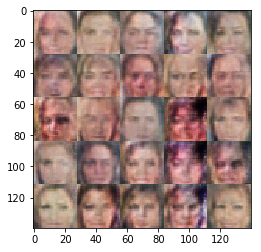

Epoch 2/5... Discriminator Loss: 0.3890... Generator Loss: 7.9725
Epoch 2/5... Discriminator Loss: 0.5188... Generator Loss: 2.0538
Epoch 2/5... Discriminator Loss: 0.3452... Generator Loss: 5.2730
Epoch 2/5... Discriminator Loss: 0.3793... Generator Loss: 3.2678
Epoch 2/5... Discriminator Loss: 0.3950... Generator Loss: 6.4644
Epoch 2/5... Discriminator Loss: 0.5983... Generator Loss: 1.5778
Epoch 2/5... Discriminator Loss: 0.4843... Generator Loss: 3.1716
Epoch 2/5... Discriminator Loss: 3.3303... Generator Loss: 7.2000
Epoch 2/5... Discriminator Loss: 0.3400... Generator Loss: 8.1905
Epoch 2/5... Discriminator Loss: 0.5255... Generator Loss: 1.8837


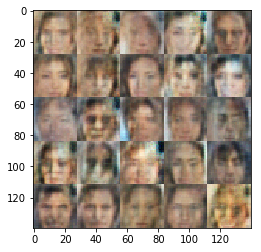

Epoch 2/5... Discriminator Loss: 0.6276... Generator Loss: 1.5470
Epoch 2/5... Discriminator Loss: 0.3454... Generator Loss: 5.4355
Epoch 2/5... Discriminator Loss: 0.4328... Generator Loss: 6.7623
Epoch 2/5... Discriminator Loss: 0.3503... Generator Loss: 5.2182
Epoch 2/5... Discriminator Loss: 0.3353... Generator Loss: 6.7154
Epoch 2/5... Discriminator Loss: 0.3475... Generator Loss: 6.0831
Epoch 2/5... Discriminator Loss: 0.3464... Generator Loss: 6.8299
Epoch 2/5... Discriminator Loss: 0.3714... Generator Loss: 3.7878
Epoch 2/5... Discriminator Loss: 0.6937... Generator Loss: 1.3054
Epoch 2/5... Discriminator Loss: 0.3361... Generator Loss: 9.1512


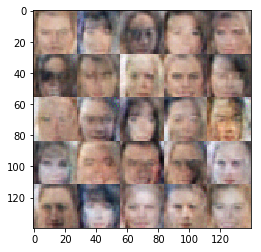

Epoch 2/5... Discriminator Loss: 0.3363... Generator Loss: 6.5627
Epoch 2/5... Discriminator Loss: 0.3399... Generator Loss: 6.9487
Epoch 2/5... Discriminator Loss: 0.3325... Generator Loss: 8.6944
Epoch 2/5... Discriminator Loss: 0.3355... Generator Loss: 6.2826
Epoch 2/5... Discriminator Loss: 0.3401... Generator Loss: 5.6406
Epoch 2/5... Discriminator Loss: 0.3316... Generator Loss: 8.3075
Epoch 2/5... Discriminator Loss: 0.3364... Generator Loss: 6.3148
Epoch 2/5... Discriminator Loss: 0.3320... Generator Loss: 9.6543
Epoch 2/5... Discriminator Loss: 0.3347... Generator Loss: 7.2880
Epoch 2/5... Discriminator Loss: 0.3334... Generator Loss: 7.5584


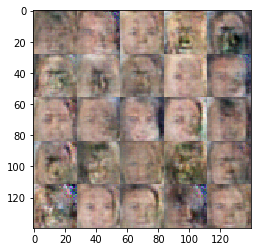

Epoch 2/5... Discriminator Loss: 0.4001... Generator Loss: 2.8450
Epoch 2/5... Discriminator Loss: 0.3378... Generator Loss: 6.3377
Epoch 2/5... Discriminator Loss: 0.3349... Generator Loss: 6.7356
Epoch 2/5... Discriminator Loss: 0.3382... Generator Loss: 5.2959
Epoch 2/5... Discriminator Loss: 0.3361... Generator Loss: 6.0030
Epoch 2/5... Discriminator Loss: 0.3317... Generator Loss: 8.1386
Epoch 2/5... Discriminator Loss: 0.3427... Generator Loss: 7.1338
Epoch 2/5... Discriminator Loss: 0.3338... Generator Loss: 6.4526
Epoch 2/5... Discriminator Loss: 0.3303... Generator Loss: 9.0968
Epoch 2/5... Discriminator Loss: 0.3317... Generator Loss: 7.2884


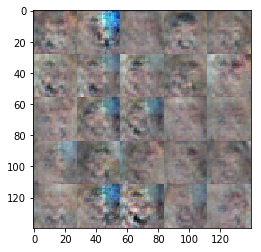

Epoch 2/5... Discriminator Loss: 0.3400... Generator Loss: 5.0743
Epoch 2/5... Discriminator Loss: 0.3319... Generator Loss: 7.3206
Epoch 2/5... Discriminator Loss: 0.3333... Generator Loss: 6.8115
Epoch 2/5... Discriminator Loss: 0.3340... Generator Loss: 6.3728
Epoch 2/5... Discriminator Loss: 0.3359... Generator Loss: 5.2943
Epoch 2/5... Discriminator Loss: 0.3432... Generator Loss: 4.6434
Epoch 2/5... Discriminator Loss: 0.3326... Generator Loss: 6.0809
Epoch 2/5... Discriminator Loss: 0.3336... Generator Loss: 8.1556
Epoch 2/5... Discriminator Loss: 0.3294... Generator Loss: 9.2947
Epoch 2/5... Discriminator Loss: 0.3293... Generator Loss: 9.2998


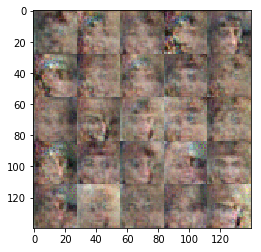

Epoch 2/5... Discriminator Loss: 0.3330... Generator Loss: 6.4318
Epoch 2/5... Discriminator Loss: 0.3408... Generator Loss: 4.8477
Epoch 2/5... Discriminator Loss: 0.3447... Generator Loss: 4.5103
Epoch 2/5... Discriminator Loss: 0.3379... Generator Loss: 7.2712
Epoch 2/5... Discriminator Loss: 0.3342... Generator Loss: 6.8024
Epoch 2/5... Discriminator Loss: 0.3662... Generator Loss: 3.5678
Epoch 2/5... Discriminator Loss: 0.3759... Generator Loss: 3.3435
Epoch 2/5... Discriminator Loss: 0.4078... Generator Loss: 7.4394
Epoch 2/5... Discriminator Loss: 0.3603... Generator Loss: 7.0590
Epoch 2/5... Discriminator Loss: 0.3885... Generator Loss: 7.1467


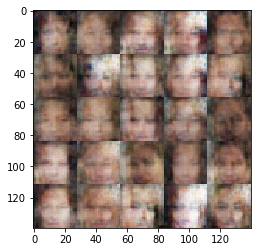

Epoch 2/5... Discriminator Loss: 0.3451... Generator Loss: 10.7384
Epoch 2/5... Discriminator Loss: 0.3557... Generator Loss: 5.4371
Epoch 2/5... Discriminator Loss: 0.3567... Generator Loss: 6.5697
Epoch 2/5... Discriminator Loss: 0.4003... Generator Loss: 4.5672
Epoch 2/5... Discriminator Loss: 0.3482... Generator Loss: 9.2137
Epoch 2/5... Discriminator Loss: 0.5088... Generator Loss: 2.1510
Epoch 2/5... Discriminator Loss: 0.4423... Generator Loss: 2.5897
Epoch 2/5... Discriminator Loss: 0.4712... Generator Loss: 2.6565
Epoch 2/5... Discriminator Loss: 0.3587... Generator Loss: 4.9597
Epoch 2/5... Discriminator Loss: 0.5212... Generator Loss: 2.4322


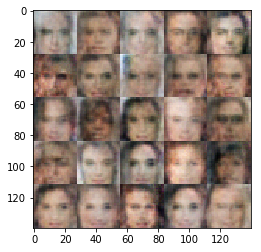

Epoch 2/5... Discriminator Loss: 0.3551... Generator Loss: 5.9757
Epoch 2/5... Discriminator Loss: 0.4169... Generator Loss: 5.6509
Epoch 2/5... Discriminator Loss: 0.3471... Generator Loss: 7.0419
Epoch 2/5... Discriminator Loss: 0.3481... Generator Loss: 6.5104
Epoch 2/5... Discriminator Loss: 0.3700... Generator Loss: 4.1753
Epoch 2/5... Discriminator Loss: 0.3671... Generator Loss: 9.4836
Epoch 2/5... Discriminator Loss: 0.3379... Generator Loss: 7.0628
Epoch 2/5... Discriminator Loss: 0.5417... Generator Loss: 1.8468
Epoch 2/5... Discriminator Loss: 0.3748... Generator Loss: 3.9710
Epoch 2/5... Discriminator Loss: 0.3386... Generator Loss: 6.3893


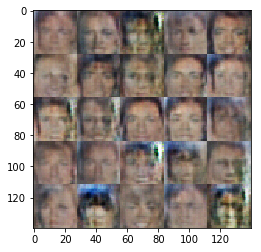

Epoch 2/5... Discriminator Loss: 0.3416... Generator Loss: 8.1490
Epoch 2/5... Discriminator Loss: 0.3426... Generator Loss: 8.1237
Epoch 2/5... Discriminator Loss: 0.3524... Generator Loss: 5.3215
Epoch 2/5... Discriminator Loss: 0.3385... Generator Loss: 6.5307
Epoch 2/5... Discriminator Loss: 0.5439... Generator Loss: 4.4424
Epoch 2/5... Discriminator Loss: 0.3534... Generator Loss: 5.0034
Epoch 2/5... Discriminator Loss: 0.4229... Generator Loss: 6.2189
Epoch 2/5... Discriminator Loss: 0.3624... Generator Loss: 5.0587
Epoch 2/5... Discriminator Loss: 0.3474... Generator Loss: 5.0826
Epoch 2/5... Discriminator Loss: 0.4994... Generator Loss: 2.0273


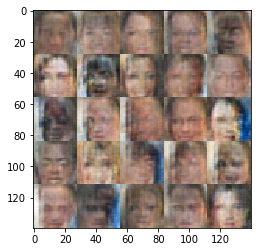

Epoch 2/5... Discriminator Loss: 0.3521... Generator Loss: 4.7417
Epoch 2/5... Discriminator Loss: 0.3660... Generator Loss: 4.5738
Epoch 2/5... Discriminator Loss: 0.3660... Generator Loss: 5.9090
Epoch 2/5... Discriminator Loss: 3.1992... Generator Loss: 0.1148
Epoch 2/5... Discriminator Loss: 1.0766... Generator Loss: 7.7314
Epoch 2/5... Discriminator Loss: 0.5252... Generator Loss: 2.4815
Epoch 2/5... Discriminator Loss: 0.3695... Generator Loss: 3.7223
Epoch 2/5... Discriminator Loss: 0.3940... Generator Loss: 3.3400
Epoch 2/5... Discriminator Loss: 0.4128... Generator Loss: 8.9423
Epoch 2/5... Discriminator Loss: 0.3527... Generator Loss: 8.8359


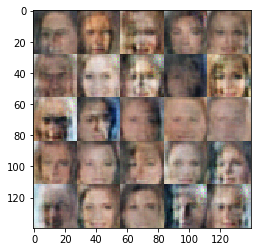

Epoch 2/5... Discriminator Loss: 0.3509... Generator Loss: 4.8298
Epoch 2/5... Discriminator Loss: 0.3376... Generator Loss: 8.0530
Epoch 2/5... Discriminator Loss: 0.3911... Generator Loss: 3.0769
Epoch 2/5... Discriminator Loss: 0.3884... Generator Loss: 3.0864
Epoch 2/5... Discriminator Loss: 0.3381... Generator Loss: 9.8374
Epoch 2/5... Discriminator Loss: 0.3464... Generator Loss: 6.6469
Epoch 2/5... Discriminator Loss: 0.3689... Generator Loss: 3.5706
Epoch 2/5... Discriminator Loss: 0.4710... Generator Loss: 2.1911
Epoch 2/5... Discriminator Loss: 0.3367... Generator Loss: 8.0531
Epoch 2/5... Discriminator Loss: 0.3909... Generator Loss: 5.8656


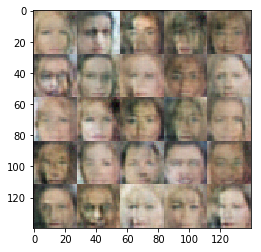

Epoch 2/5... Discriminator Loss: 0.3607... Generator Loss: 5.2866
Epoch 2/5... Discriminator Loss: 0.8251... Generator Loss: 7.3364
Epoch 2/5... Discriminator Loss: 0.4107... Generator Loss: 4.3355
Epoch 2/5... Discriminator Loss: 0.3477... Generator Loss: 7.0169
Epoch 2/5... Discriminator Loss: 0.3606... Generator Loss: 4.0583
Epoch 2/5... Discriminator Loss: 0.3896... Generator Loss: 4.2718
Epoch 3/5... Discriminator Loss: 0.4356... Generator Loss: 2.7355
Epoch 3/5... Discriminator Loss: 0.3479... Generator Loss: 6.7482
Epoch 3/5... Discriminator Loss: 0.6350... Generator Loss: 1.6472
Epoch 3/5... Discriminator Loss: 0.7146... Generator Loss: 1.2859


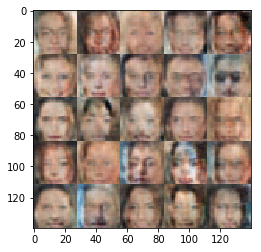

Epoch 3/5... Discriminator Loss: 4.6445... Generator Loss: 9.3667
Epoch 3/5... Discriminator Loss: 0.3877... Generator Loss: 5.1236
Epoch 3/5... Discriminator Loss: 0.5339... Generator Loss: 1.9256
Epoch 3/5... Discriminator Loss: 0.3775... Generator Loss: 3.3610
Epoch 3/5... Discriminator Loss: 0.5522... Generator Loss: 7.7712
Epoch 3/5... Discriminator Loss: 0.3622... Generator Loss: 3.8773
Epoch 3/5... Discriminator Loss: 0.5162... Generator Loss: 1.9944
Epoch 3/5... Discriminator Loss: 0.3369... Generator Loss: 9.1834
Epoch 3/5... Discriminator Loss: 0.3835... Generator Loss: 3.1735
Epoch 3/5... Discriminator Loss: 0.3608... Generator Loss: 6.0583


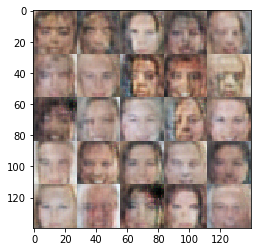

Epoch 3/5... Discriminator Loss: 0.3452... Generator Loss: 4.7109
Epoch 3/5... Discriminator Loss: 0.3895... Generator Loss: 3.1581
Epoch 3/5... Discriminator Loss: 0.3450... Generator Loss: 5.1051
Epoch 3/5... Discriminator Loss: 0.3340... Generator Loss: 9.4667
Epoch 3/5... Discriminator Loss: 0.3395... Generator Loss: 5.4139
Epoch 3/5... Discriminator Loss: 0.3460... Generator Loss: 4.8060
Epoch 3/5... Discriminator Loss: 0.3475... Generator Loss: 4.5155
Epoch 3/5... Discriminator Loss: 0.3373... Generator Loss: 10.9692
Epoch 3/5... Discriminator Loss: 0.3399... Generator Loss: 8.7648
Epoch 3/5... Discriminator Loss: 0.3313... Generator Loss: 9.0433


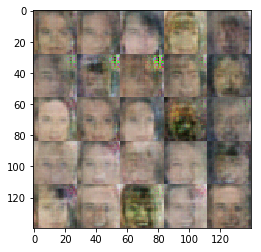

Epoch 3/5... Discriminator Loss: 0.3313... Generator Loss: 7.9807
Epoch 3/5... Discriminator Loss: 0.3316... Generator Loss: 7.5036
Epoch 3/5... Discriminator Loss: 0.3326... Generator Loss: 7.1198
Epoch 3/5... Discriminator Loss: 0.3335... Generator Loss: 6.5627
Epoch 3/5... Discriminator Loss: 0.3327... Generator Loss: 6.6939
Epoch 3/5... Discriminator Loss: 0.3387... Generator Loss: 5.9730
Epoch 3/5... Discriminator Loss: 0.3323... Generator Loss: 6.6255
Epoch 3/5... Discriminator Loss: 0.3605... Generator Loss: 3.7017
Epoch 3/5... Discriminator Loss: 0.3329... Generator Loss: 5.6154
Epoch 3/5... Discriminator Loss: 0.3315... Generator Loss: 6.6708


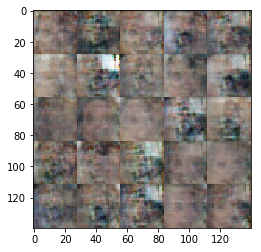

Epoch 3/5... Discriminator Loss: 0.3420... Generator Loss: 4.5847
Epoch 3/5... Discriminator Loss: 0.3986... Generator Loss: 2.9053
Epoch 3/5... Discriminator Loss: 0.3370... Generator Loss: 5.8503
Epoch 3/5... Discriminator Loss: 0.7385... Generator Loss: 1.3352
Epoch 3/5... Discriminator Loss: 0.3442... Generator Loss: 11.2252
Epoch 3/5... Discriminator Loss: 0.3371... Generator Loss: 10.5493
Epoch 3/5... Discriminator Loss: 0.3316... Generator Loss: 9.8594
Epoch 3/5... Discriminator Loss: 0.3330... Generator Loss: 7.3885
Epoch 3/5... Discriminator Loss: 0.3345... Generator Loss: 8.4205
Epoch 3/5... Discriminator Loss: 0.6397... Generator Loss: 1.4941


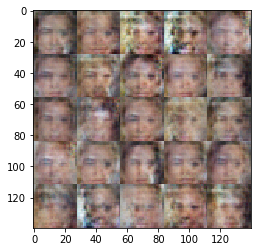

Epoch 3/5... Discriminator Loss: 0.3311... Generator Loss: 11.3540
Epoch 3/5... Discriminator Loss: 0.3411... Generator Loss: 7.9450
Epoch 3/5... Discriminator Loss: 0.3556... Generator Loss: 5.4185
Epoch 3/5... Discriminator Loss: 2.6012... Generator Loss: 0.4138
Epoch 3/5... Discriminator Loss: 0.4186... Generator Loss: 4.3764
Epoch 3/5... Discriminator Loss: 0.3843... Generator Loss: 4.0846
Epoch 3/5... Discriminator Loss: 0.3471... Generator Loss: 8.4946
Epoch 3/5... Discriminator Loss: 0.3464... Generator Loss: 5.6909
Epoch 3/5... Discriminator Loss: 0.4419... Generator Loss: 2.4988
Epoch 3/5... Discriminator Loss: 0.3935... Generator Loss: 5.7058


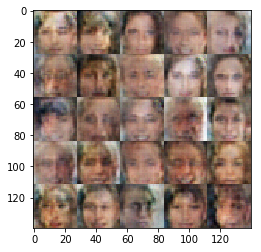

Epoch 3/5... Discriminator Loss: 0.5151... Generator Loss: 2.1406
Epoch 3/5... Discriminator Loss: 0.7881... Generator Loss: 1.1758
Epoch 3/5... Discriminator Loss: 0.3398... Generator Loss: 7.3497
Epoch 3/5... Discriminator Loss: 0.5998... Generator Loss: 1.6321
Epoch 3/5... Discriminator Loss: 0.3848... Generator Loss: 3.2918
Epoch 3/5... Discriminator Loss: 0.4172... Generator Loss: 3.1743
Epoch 3/5... Discriminator Loss: 1.1011... Generator Loss: 0.7908
Epoch 3/5... Discriminator Loss: 0.4230... Generator Loss: 2.7293
Epoch 3/5... Discriminator Loss: 0.7502... Generator Loss: 1.2457
Epoch 3/5... Discriminator Loss: 0.4006... Generator Loss: 3.0606


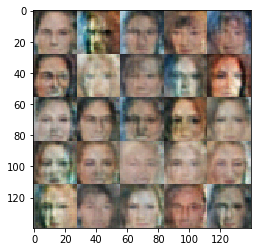

Epoch 3/5... Discriminator Loss: 0.3418... Generator Loss: 5.9753
Epoch 3/5... Discriminator Loss: 0.3362... Generator Loss: 8.1407
Epoch 3/5... Discriminator Loss: 0.3350... Generator Loss: 10.3134
Epoch 3/5... Discriminator Loss: 0.3807... Generator Loss: 3.9279
Epoch 3/5... Discriminator Loss: 0.3434... Generator Loss: 9.2550
Epoch 3/5... Discriminator Loss: 0.3338... Generator Loss: 7.1102
Epoch 3/5... Discriminator Loss: 0.7421... Generator Loss: 1.3432
Epoch 3/5... Discriminator Loss: 0.5024... Generator Loss: 2.3884
Epoch 3/5... Discriminator Loss: 0.3450... Generator Loss: 5.1972
Epoch 3/5... Discriminator Loss: 0.3494... Generator Loss: 5.3933


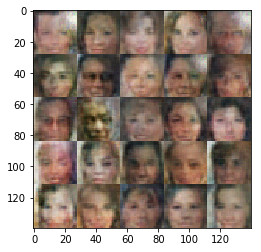

Epoch 3/5... Discriminator Loss: 0.5077... Generator Loss: 2.8868
Epoch 3/5... Discriminator Loss: 0.3338... Generator Loss: 7.6622
Epoch 3/5... Discriminator Loss: 0.4762... Generator Loss: 2.4468
Epoch 3/5... Discriminator Loss: 0.3353... Generator Loss: 8.0549
Epoch 3/5... Discriminator Loss: 0.3342... Generator Loss: 9.0215
Epoch 3/5... Discriminator Loss: 0.3918... Generator Loss: 8.3516
Epoch 3/5... Discriminator Loss: 0.7712... Generator Loss: 7.3284
Epoch 3/5... Discriminator Loss: 0.3764... Generator Loss: 8.2718
Epoch 3/5... Discriminator Loss: 3.6460... Generator Loss: 6.0854
Epoch 3/5... Discriminator Loss: 0.4219... Generator Loss: 6.4220


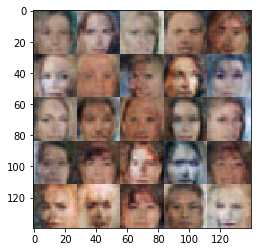

Epoch 3/5... Discriminator Loss: 0.3646... Generator Loss: 4.3444
Epoch 3/5... Discriminator Loss: 1.2112... Generator Loss: 5.3834
Epoch 3/5... Discriminator Loss: 0.4195... Generator Loss: 4.0302
Epoch 3/5... Discriminator Loss: 0.3861... Generator Loss: 3.2710
Epoch 3/5... Discriminator Loss: 0.5410... Generator Loss: 1.9967
Epoch 3/5... Discriminator Loss: 0.6720... Generator Loss: 1.3649
Epoch 3/5... Discriminator Loss: 0.3464... Generator Loss: 5.9615
Epoch 3/5... Discriminator Loss: 0.4146... Generator Loss: 6.9238
Epoch 3/5... Discriminator Loss: 0.3729... Generator Loss: 10.1077
Epoch 3/5... Discriminator Loss: 0.5736... Generator Loss: 9.0551


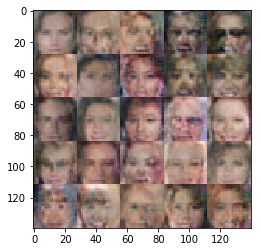

Epoch 3/5... Discriminator Loss: 0.3829... Generator Loss: 3.5789
Epoch 3/5... Discriminator Loss: 0.3347... Generator Loss: 10.8830
Epoch 3/5... Discriminator Loss: 0.3490... Generator Loss: 10.2856
Epoch 3/5... Discriminator Loss: 0.3365... Generator Loss: 11.4856
Epoch 3/5... Discriminator Loss: 0.3463... Generator Loss: 4.9777
Epoch 3/5... Discriminator Loss: 0.3444... Generator Loss: 9.7479
Epoch 3/5... Discriminator Loss: 0.3376... Generator Loss: 6.1264
Epoch 3/5... Discriminator Loss: 0.3909... Generator Loss: 4.2100
Epoch 3/5... Discriminator Loss: 0.3788... Generator Loss: 10.0231
Epoch 3/5... Discriminator Loss: 0.3881... Generator Loss: 11.0141


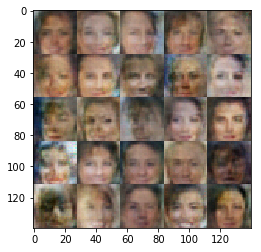

Epoch 3/5... Discriminator Loss: 0.3421... Generator Loss: 8.2670
Epoch 3/5... Discriminator Loss: 0.4950... Generator Loss: 2.1098
Epoch 3/5... Discriminator Loss: 0.3322... Generator Loss: 8.0609
Epoch 3/5... Discriminator Loss: 0.3337... Generator Loss: 9.4859
Epoch 3/5... Discriminator Loss: 0.3596... Generator Loss: 3.7280
Epoch 3/5... Discriminator Loss: 0.3310... Generator Loss: 7.3981
Epoch 3/5... Discriminator Loss: 0.3340... Generator Loss: 8.4952
Epoch 3/5... Discriminator Loss: 1.3144... Generator Loss: 10.3156
Epoch 3/5... Discriminator Loss: 0.3368... Generator Loss: 9.4282
Epoch 3/5... Discriminator Loss: 0.4060... Generator Loss: 3.1595


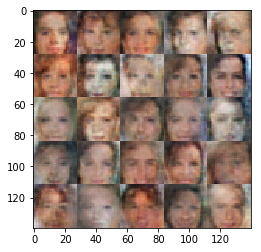

Epoch 3/5... Discriminator Loss: 0.3714... Generator Loss: 10.6267
Epoch 3/5... Discriminator Loss: 0.3347... Generator Loss: 6.3917
Epoch 3/5... Discriminator Loss: 1.5780... Generator Loss: 0.3909
Epoch 3/5... Discriminator Loss: 0.3834... Generator Loss: 7.6408
Epoch 3/5... Discriminator Loss: 0.3934... Generator Loss: 3.5414
Epoch 3/5... Discriminator Loss: 0.3584... Generator Loss: 4.5933
Epoch 3/5... Discriminator Loss: 0.6752... Generator Loss: 8.9987
Epoch 3/5... Discriminator Loss: 0.5106... Generator Loss: 2.1786
Epoch 3/5... Discriminator Loss: 0.3363... Generator Loss: 8.2955
Epoch 3/5... Discriminator Loss: 0.3518... Generator Loss: 6.3956


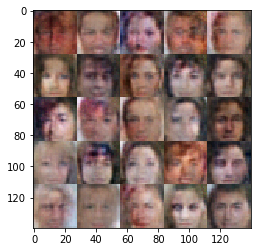

Epoch 3/5... Discriminator Loss: 0.3380... Generator Loss: 7.0833
Epoch 3/5... Discriminator Loss: 0.4489... Generator Loss: 2.4461
Epoch 3/5... Discriminator Loss: 0.3685... Generator Loss: 6.9207
Epoch 3/5... Discriminator Loss: 0.3401... Generator Loss: 5.9977
Epoch 3/5... Discriminator Loss: 0.4783... Generator Loss: 2.7787
Epoch 3/5... Discriminator Loss: 0.3463... Generator Loss: 8.2223
Epoch 3/5... Discriminator Loss: 0.3476... Generator Loss: 4.6635
Epoch 3/5... Discriminator Loss: 0.3977... Generator Loss: 3.3329
Epoch 3/5... Discriminator Loss: 1.3249... Generator Loss: 0.7095
Epoch 3/5... Discriminator Loss: 1.3682... Generator Loss: 0.5399


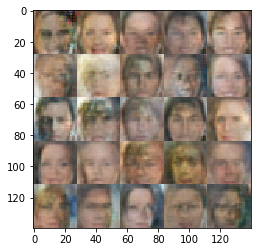

Epoch 3/5... Discriminator Loss: 0.3717... Generator Loss: 4.1654
Epoch 3/5... Discriminator Loss: 0.6927... Generator Loss: 1.3748
Epoch 3/5... Discriminator Loss: 0.4501... Generator Loss: 2.6868
Epoch 3/5... Discriminator Loss: 0.6733... Generator Loss: 7.6949
Epoch 3/5... Discriminator Loss: 1.1619... Generator Loss: 0.7060
Epoch 3/5... Discriminator Loss: 0.4031... Generator Loss: 3.1115
Epoch 3/5... Discriminator Loss: 1.2738... Generator Loss: 6.3670
Epoch 3/5... Discriminator Loss: 0.4077... Generator Loss: 5.9321
Epoch 3/5... Discriminator Loss: 0.4522... Generator Loss: 6.5768
Epoch 3/5... Discriminator Loss: 0.5833... Generator Loss: 1.7938


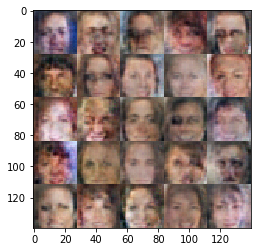

Epoch 3/5... Discriminator Loss: 0.3444... Generator Loss: 4.8905
Epoch 3/5... Discriminator Loss: 0.3371... Generator Loss: 8.6815
Epoch 3/5... Discriminator Loss: 0.3534... Generator Loss: 5.5268
Epoch 3/5... Discriminator Loss: 0.5496... Generator Loss: 1.8621
Epoch 3/5... Discriminator Loss: 0.3712... Generator Loss: 3.5268
Epoch 3/5... Discriminator Loss: 0.3502... Generator Loss: 4.9106
Epoch 3/5... Discriminator Loss: 0.3444... Generator Loss: 6.6532
Epoch 3/5... Discriminator Loss: 1.9081... Generator Loss: 0.3293
Epoch 3/5... Discriminator Loss: 0.3537... Generator Loss: 5.9045
Epoch 3/5... Discriminator Loss: 0.7754... Generator Loss: 1.1612


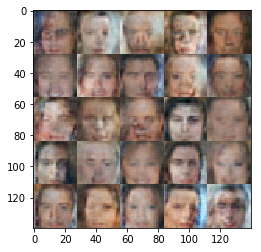

Epoch 3/5... Discriminator Loss: 0.4037... Generator Loss: 3.0757
Epoch 3/5... Discriminator Loss: 0.7732... Generator Loss: 1.1652
Epoch 3/5... Discriminator Loss: 0.3435... Generator Loss: 5.7049
Epoch 3/5... Discriminator Loss: 0.3382... Generator Loss: 8.4727
Epoch 4/5... Discriminator Loss: 0.3539... Generator Loss: 4.5655
Epoch 4/5... Discriminator Loss: 0.3456... Generator Loss: 4.6253
Epoch 4/5... Discriminator Loss: 0.3345... Generator Loss: 9.4543
Epoch 4/5... Discriminator Loss: 1.0079... Generator Loss: 3.5472
Epoch 4/5... Discriminator Loss: 0.3473... Generator Loss: 9.7361
Epoch 4/5... Discriminator Loss: 0.6107... Generator Loss: 9.9489


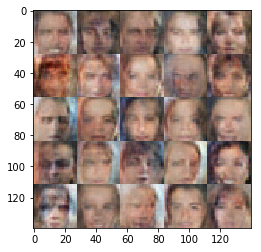

Epoch 4/5... Discriminator Loss: 0.3389... Generator Loss: 7.5302
Epoch 4/5... Discriminator Loss: 0.3857... Generator Loss: 4.1945
Epoch 4/5... Discriminator Loss: 0.3494... Generator Loss: 5.8151
Epoch 4/5... Discriminator Loss: 0.3460... Generator Loss: 9.9348
Epoch 4/5... Discriminator Loss: 0.3447... Generator Loss: 5.1916
Epoch 4/5... Discriminator Loss: 0.3948... Generator Loss: 8.7083
Epoch 4/5... Discriminator Loss: 0.4119... Generator Loss: 2.8282
Epoch 4/5... Discriminator Loss: 0.3524... Generator Loss: 4.5195
Epoch 4/5... Discriminator Loss: 0.3461... Generator Loss: 6.3238
Epoch 4/5... Discriminator Loss: 0.3753... Generator Loss: 9.0878


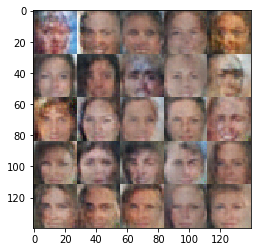

Epoch 4/5... Discriminator Loss: 0.3370... Generator Loss: 8.5048
Epoch 4/5... Discriminator Loss: 0.3392... Generator Loss: 7.5491
Epoch 4/5... Discriminator Loss: 0.5729... Generator Loss: 1.8685
Epoch 4/5... Discriminator Loss: 0.3516... Generator Loss: 4.5775
Epoch 4/5... Discriminator Loss: 0.6683... Generator Loss: 1.6880
Epoch 4/5... Discriminator Loss: 0.4823... Generator Loss: 3.2218
Epoch 4/5... Discriminator Loss: 0.9626... Generator Loss: 0.8643
Epoch 4/5... Discriminator Loss: 2.6404... Generator Loss: 4.8902
Epoch 4/5... Discriminator Loss: 1.6769... Generator Loss: 0.3872
Epoch 4/5... Discriminator Loss: 0.5489... Generator Loss: 3.7990


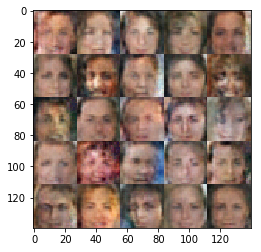

Epoch 4/5... Discriminator Loss: 0.5502... Generator Loss: 2.0440
Epoch 4/5... Discriminator Loss: 0.6076... Generator Loss: 1.6962
Epoch 4/5... Discriminator Loss: 0.4829... Generator Loss: 2.5182
Epoch 4/5... Discriminator Loss: 0.7701... Generator Loss: 1.2122
Epoch 4/5... Discriminator Loss: 0.4169... Generator Loss: 3.0214
Epoch 4/5... Discriminator Loss: 0.3423... Generator Loss: 7.3839
Epoch 4/5... Discriminator Loss: 0.4495... Generator Loss: 2.4208
Epoch 4/5... Discriminator Loss: 0.3465... Generator Loss: 5.7019
Epoch 4/5... Discriminator Loss: 0.4783... Generator Loss: 2.3930
Epoch 4/5... Discriminator Loss: 0.3527... Generator Loss: 10.1831


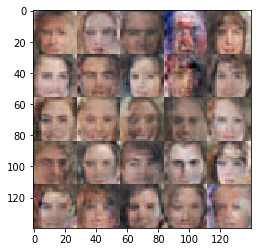

Epoch 4/5... Discriminator Loss: 0.3425... Generator Loss: 9.1120
Epoch 4/5... Discriminator Loss: 0.3925... Generator Loss: 3.3114
Epoch 4/5... Discriminator Loss: 0.3430... Generator Loss: 5.7765
Epoch 4/5... Discriminator Loss: 0.4875... Generator Loss: 2.2004
Epoch 4/5... Discriminator Loss: 0.3712... Generator Loss: 4.3022
Epoch 4/5... Discriminator Loss: 0.3735... Generator Loss: 3.8893
Epoch 4/5... Discriminator Loss: 0.4457... Generator Loss: 4.4564
Epoch 4/5... Discriminator Loss: 0.3681... Generator Loss: 7.2561
Epoch 4/5... Discriminator Loss: 0.3700... Generator Loss: 4.5693
Epoch 4/5... Discriminator Loss: 0.3585... Generator Loss: 4.3172


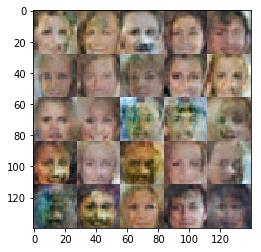

Epoch 4/5... Discriminator Loss: 1.7930... Generator Loss: 1.3187
Epoch 4/5... Discriminator Loss: 0.6049... Generator Loss: 1.8068
Epoch 4/5... Discriminator Loss: 0.4483... Generator Loss: 2.7363
Epoch 4/5... Discriminator Loss: 0.4493... Generator Loss: 2.7112
Epoch 4/5... Discriminator Loss: 0.4127... Generator Loss: 3.1308
Epoch 4/5... Discriminator Loss: 0.3469... Generator Loss: 5.5831
Epoch 4/5... Discriminator Loss: 0.4089... Generator Loss: 3.0701
Epoch 4/5... Discriminator Loss: 0.3390... Generator Loss: 6.2206
Epoch 4/5... Discriminator Loss: 0.4935... Generator Loss: 2.1403
Epoch 4/5... Discriminator Loss: 0.7024... Generator Loss: 1.4358


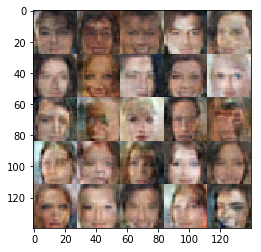

Epoch 4/5... Discriminator Loss: 0.3473... Generator Loss: 5.7643
Epoch 4/5... Discriminator Loss: 0.4309... Generator Loss: 4.1559
Epoch 4/5... Discriminator Loss: 0.4567... Generator Loss: 2.3223
Epoch 4/5... Discriminator Loss: 0.3743... Generator Loss: 3.6523
Epoch 4/5... Discriminator Loss: 0.3469... Generator Loss: 9.6761
Epoch 4/5... Discriminator Loss: 0.3411... Generator Loss: 7.2203
Epoch 4/5... Discriminator Loss: 0.3431... Generator Loss: 9.6509
Epoch 4/5... Discriminator Loss: 2.5285... Generator Loss: 4.3562
Epoch 4/5... Discriminator Loss: 0.8231... Generator Loss: 1.2466
Epoch 4/5... Discriminator Loss: 0.7675... Generator Loss: 1.8868


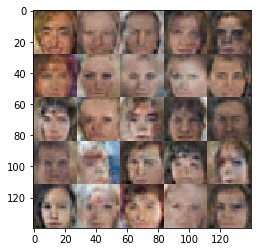

Epoch 4/5... Discriminator Loss: 0.5528... Generator Loss: 4.4908
Epoch 4/5... Discriminator Loss: 0.5976... Generator Loss: 3.5979
Epoch 4/5... Discriminator Loss: 0.4250... Generator Loss: 3.2627
Epoch 4/5... Discriminator Loss: 0.4521... Generator Loss: 2.5270
Epoch 4/5... Discriminator Loss: 1.3614... Generator Loss: 0.6145
Epoch 4/5... Discriminator Loss: 0.7166... Generator Loss: 7.9027
Epoch 4/5... Discriminator Loss: 0.4378... Generator Loss: 2.7484
Epoch 4/5... Discriminator Loss: 0.3541... Generator Loss: 6.5093
Epoch 4/5... Discriminator Loss: 0.4879... Generator Loss: 2.7472
Epoch 4/5... Discriminator Loss: 0.4784... Generator Loss: 2.2721


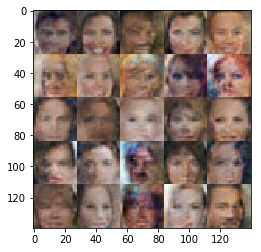

Epoch 4/5... Discriminator Loss: 0.4531... Generator Loss: 2.5403
Epoch 4/5... Discriminator Loss: 0.3522... Generator Loss: 8.8562
Epoch 4/5... Discriminator Loss: 0.3377... Generator Loss: 6.9297
Epoch 4/5... Discriminator Loss: 0.6146... Generator Loss: 1.6390
Epoch 4/5... Discriminator Loss: 0.3436... Generator Loss: 6.8138
Epoch 4/5... Discriminator Loss: 0.3510... Generator Loss: 6.5187
Epoch 4/5... Discriminator Loss: 0.6527... Generator Loss: 1.4371
Epoch 4/5... Discriminator Loss: 1.0870... Generator Loss: 0.7116
Epoch 4/5... Discriminator Loss: 0.4006... Generator Loss: 7.7948
Epoch 4/5... Discriminator Loss: 0.3606... Generator Loss: 4.7240


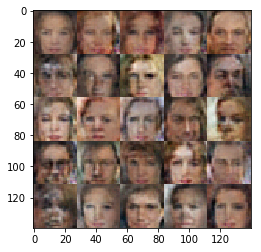

Epoch 4/5... Discriminator Loss: 0.6267... Generator Loss: 8.0153
Epoch 4/5... Discriminator Loss: 0.5045... Generator Loss: 2.1421
Epoch 4/5... Discriminator Loss: 0.3484... Generator Loss: 5.2604
Epoch 4/5... Discriminator Loss: 0.4182... Generator Loss: 2.7974
Epoch 4/5... Discriminator Loss: 0.3439... Generator Loss: 10.7128
Epoch 4/5... Discriminator Loss: 1.0185... Generator Loss: 0.8675
Epoch 4/5... Discriminator Loss: 2.6727... Generator Loss: 0.1671
Epoch 4/5... Discriminator Loss: 0.4526... Generator Loss: 2.8485
Epoch 4/5... Discriminator Loss: 0.4143... Generator Loss: 3.1030
Epoch 4/5... Discriminator Loss: 0.6178... Generator Loss: 2.4134


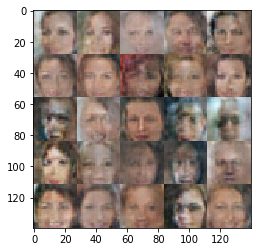

Epoch 4/5... Discriminator Loss: 0.4502... Generator Loss: 2.6832
Epoch 4/5... Discriminator Loss: 0.4076... Generator Loss: 3.3666
Epoch 4/5... Discriminator Loss: 0.7988... Generator Loss: 1.7481
Epoch 4/5... Discriminator Loss: 0.4056... Generator Loss: 3.0928
Epoch 4/5... Discriminator Loss: 0.5142... Generator Loss: 2.1262
Epoch 4/5... Discriminator Loss: 0.3531... Generator Loss: 4.5221
Epoch 4/5... Discriminator Loss: 0.3967... Generator Loss: 3.3407
Epoch 4/5... Discriminator Loss: 0.3399... Generator Loss: 8.9349
Epoch 4/5... Discriminator Loss: 0.3659... Generator Loss: 5.7859
Epoch 4/5... Discriminator Loss: 0.3529... Generator Loss: 5.9164


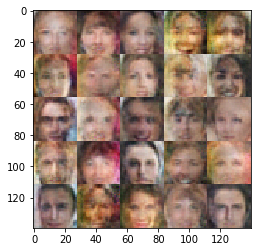

Epoch 4/5... Discriminator Loss: 0.3493... Generator Loss: 5.2431
Epoch 4/5... Discriminator Loss: 0.3560... Generator Loss: 6.8239
Epoch 4/5... Discriminator Loss: 0.5718... Generator Loss: 1.7972
Epoch 4/5... Discriminator Loss: 0.5986... Generator Loss: 10.7063
Epoch 4/5... Discriminator Loss: 0.3645... Generator Loss: 6.2442
Epoch 4/5... Discriminator Loss: 0.4288... Generator Loss: 2.6510
Epoch 4/5... Discriminator Loss: 0.4034... Generator Loss: 8.3188
Epoch 4/5... Discriminator Loss: 0.6683... Generator Loss: 1.4317
Epoch 4/5... Discriminator Loss: 0.4078... Generator Loss: 2.9325
Epoch 4/5... Discriminator Loss: 0.3614... Generator Loss: 4.0427


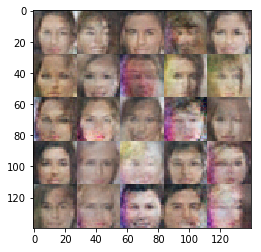

Epoch 4/5... Discriminator Loss: 0.3345... Generator Loss: 7.5895
Epoch 4/5... Discriminator Loss: 1.5931... Generator Loss: 8.3334
Epoch 4/5... Discriminator Loss: 0.4585... Generator Loss: 2.7484
Epoch 4/5... Discriminator Loss: 1.6176... Generator Loss: 4.2665
Epoch 4/5... Discriminator Loss: 1.4017... Generator Loss: 6.1002
Epoch 4/5... Discriminator Loss: 0.4496... Generator Loss: 2.8779
Epoch 4/5... Discriminator Loss: 0.3712... Generator Loss: 4.2595
Epoch 4/5... Discriminator Loss: 0.4705... Generator Loss: 2.3555
Epoch 4/5... Discriminator Loss: 0.5845... Generator Loss: 1.6736
Epoch 4/5... Discriminator Loss: 0.3557... Generator Loss: 4.8013


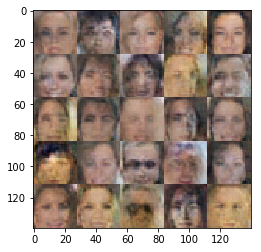

Epoch 4/5... Discriminator Loss: 0.6958... Generator Loss: 1.3383
Epoch 4/5... Discriminator Loss: 0.3677... Generator Loss: 4.0803
Epoch 4/5... Discriminator Loss: 0.4626... Generator Loss: 2.3519
Epoch 4/5... Discriminator Loss: 0.3696... Generator Loss: 3.6929
Epoch 4/5... Discriminator Loss: 1.1656... Generator Loss: 2.9984
Epoch 4/5... Discriminator Loss: 0.7960... Generator Loss: 1.3558
Epoch 4/5... Discriminator Loss: 0.4093... Generator Loss: 3.4983
Epoch 4/5... Discriminator Loss: 0.7036... Generator Loss: 1.4624
Epoch 4/5... Discriminator Loss: 0.4434... Generator Loss: 3.9061
Epoch 4/5... Discriminator Loss: 0.3570... Generator Loss: 6.8542


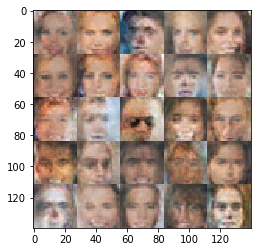

Epoch 4/5... Discriminator Loss: 0.3755... Generator Loss: 3.9373
Epoch 4/5... Discriminator Loss: 0.5493... Generator Loss: 6.9820
Epoch 4/5... Discriminator Loss: 2.7317... Generator Loss: 5.9145
Epoch 4/5... Discriminator Loss: 0.4649... Generator Loss: 4.9514
Epoch 4/5... Discriminator Loss: 0.7854... Generator Loss: 3.7407
Epoch 4/5... Discriminator Loss: 0.4259... Generator Loss: 2.7853
Epoch 4/5... Discriminator Loss: 0.3438... Generator Loss: 7.3938
Epoch 4/5... Discriminator Loss: 0.3655... Generator Loss: 4.0662
Epoch 4/5... Discriminator Loss: 0.3618... Generator Loss: 5.2989
Epoch 4/5... Discriminator Loss: 0.3436... Generator Loss: 7.8563


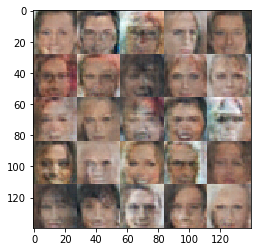

Epoch 4/5... Discriminator Loss: 0.4590... Generator Loss: 2.3959
Epoch 4/5... Discriminator Loss: 0.3948... Generator Loss: 3.1833
Epoch 4/5... Discriminator Loss: 0.3440... Generator Loss: 10.1114
Epoch 4/5... Discriminator Loss: 0.3396... Generator Loss: 6.3483
Epoch 4/5... Discriminator Loss: 0.3500... Generator Loss: 5.2862
Epoch 4/5... Discriminator Loss: 0.5363... Generator Loss: 1.9236
Epoch 4/5... Discriminator Loss: 0.3682... Generator Loss: 4.1399
Epoch 4/5... Discriminator Loss: 0.3492... Generator Loss: 5.0221
Epoch 4/5... Discriminator Loss: 0.3440... Generator Loss: 6.0944
Epoch 4/5... Discriminator Loss: 0.3604... Generator Loss: 4.4426


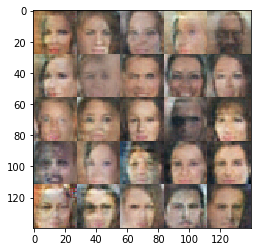

Epoch 4/5... Discriminator Loss: 0.3775... Generator Loss: 4.0014
Epoch 4/5... Discriminator Loss: 0.3501... Generator Loss: 7.0035
Epoch 5/5... Discriminator Loss: 0.4234... Generator Loss: 2.8247
Epoch 5/5... Discriminator Loss: 0.4175... Generator Loss: 3.2970
Epoch 5/5... Discriminator Loss: 0.4620... Generator Loss: 2.4137
Epoch 5/5... Discriminator Loss: 1.4011... Generator Loss: 0.7015
Epoch 5/5... Discriminator Loss: 0.8051... Generator Loss: 1.1710
Epoch 5/5... Discriminator Loss: 0.3463... Generator Loss: 5.3631
Epoch 5/5... Discriminator Loss: 0.3463... Generator Loss: 6.1025
Epoch 5/5... Discriminator Loss: 0.6077... Generator Loss: 3.6632


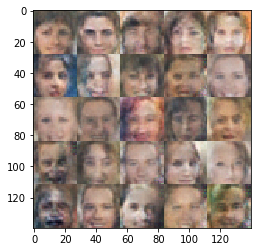

Epoch 5/5... Discriminator Loss: 0.4564... Generator Loss: 2.4612
Epoch 5/5... Discriminator Loss: 0.5971... Generator Loss: 9.6726
Epoch 5/5... Discriminator Loss: 0.3492... Generator Loss: 5.3226
Epoch 5/5... Discriminator Loss: 0.5306... Generator Loss: 1.9982
Epoch 5/5... Discriminator Loss: 0.3796... Generator Loss: 3.5309
Epoch 5/5... Discriminator Loss: 0.3581... Generator Loss: 8.5634
Epoch 5/5... Discriminator Loss: 0.3456... Generator Loss: 6.5247
Epoch 5/5... Discriminator Loss: 0.4004... Generator Loss: 2.9628
Epoch 5/5... Discriminator Loss: 1.4088... Generator Loss: 1.1755
Epoch 5/5... Discriminator Loss: 0.4348... Generator Loss: 2.8058


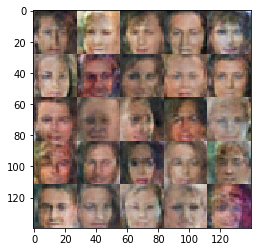

Epoch 5/5... Discriminator Loss: 0.3601... Generator Loss: 4.9067
Epoch 5/5... Discriminator Loss: 0.4484... Generator Loss: 2.5702
Epoch 5/5... Discriminator Loss: 1.3917... Generator Loss: 0.7731
Epoch 5/5... Discriminator Loss: 0.5275... Generator Loss: 2.4566
Epoch 5/5... Discriminator Loss: 0.6166... Generator Loss: 3.9741
Epoch 5/5... Discriminator Loss: 0.5643... Generator Loss: 1.8217
Epoch 5/5... Discriminator Loss: 1.1768... Generator Loss: 0.6806
Epoch 5/5... Discriminator Loss: 0.9056... Generator Loss: 5.0061
Epoch 5/5... Discriminator Loss: 0.4003... Generator Loss: 4.6270
Epoch 5/5... Discriminator Loss: 0.9392... Generator Loss: 1.0091


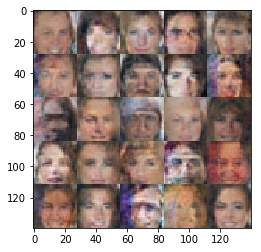

Epoch 5/5... Discriminator Loss: 0.4666... Generator Loss: 2.5503
Epoch 5/5... Discriminator Loss: 0.3445... Generator Loss: 6.7876
Epoch 5/5... Discriminator Loss: 0.9585... Generator Loss: 0.8930
Epoch 5/5... Discriminator Loss: 0.3494... Generator Loss: 7.2751
Epoch 5/5... Discriminator Loss: 0.3536... Generator Loss: 5.6201
Epoch 5/5... Discriminator Loss: 0.3848... Generator Loss: 3.5961
Epoch 5/5... Discriminator Loss: 0.3633... Generator Loss: 7.4726
Epoch 5/5... Discriminator Loss: 0.4969... Generator Loss: 2.1537
Epoch 5/5... Discriminator Loss: 0.3892... Generator Loss: 4.9778
Epoch 5/5... Discriminator Loss: 0.3412... Generator Loss: 8.5065


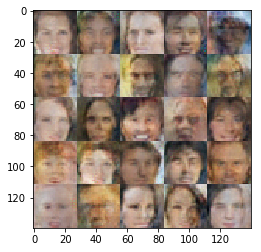

Epoch 5/5... Discriminator Loss: 0.6723... Generator Loss: 1.3869
Epoch 5/5... Discriminator Loss: 0.3898... Generator Loss: 3.6515
Epoch 5/5... Discriminator Loss: 0.3449... Generator Loss: 5.3160
Epoch 5/5... Discriminator Loss: 0.9287... Generator Loss: 2.4059
Epoch 5/5... Discriminator Loss: 0.5542... Generator Loss: 2.2440
Epoch 5/5... Discriminator Loss: 0.3802... Generator Loss: 3.9261
Epoch 5/5... Discriminator Loss: 0.5898... Generator Loss: 1.6546
Epoch 5/5... Discriminator Loss: 0.4783... Generator Loss: 2.2237
Epoch 5/5... Discriminator Loss: 0.3465... Generator Loss: 5.7823
Epoch 5/5... Discriminator Loss: 0.5204... Generator Loss: 2.0154


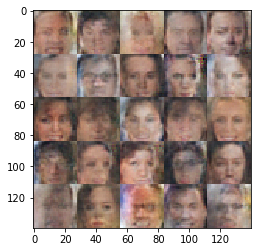

Epoch 5/5... Discriminator Loss: 0.3428... Generator Loss: 5.8514
Epoch 5/5... Discriminator Loss: 0.3850... Generator Loss: 9.0610
Epoch 5/5... Discriminator Loss: 0.3469... Generator Loss: 5.3971
Epoch 5/5... Discriminator Loss: 0.3947... Generator Loss: 5.9482
Epoch 5/5... Discriminator Loss: 0.8041... Generator Loss: 7.8103
Epoch 5/5... Discriminator Loss: 0.7232... Generator Loss: 4.0159
Epoch 5/5... Discriminator Loss: 0.7559... Generator Loss: 1.2721
Epoch 5/5... Discriminator Loss: 0.9264... Generator Loss: 0.9170
Epoch 5/5... Discriminator Loss: 0.9216... Generator Loss: 0.9654
Epoch 5/5... Discriminator Loss: 0.5078... Generator Loss: 2.2402


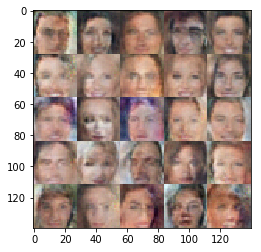

Epoch 5/5... Discriminator Loss: 0.3730... Generator Loss: 3.8659
Epoch 5/5... Discriminator Loss: 1.4206... Generator Loss: 0.5122
Epoch 5/5... Discriminator Loss: 0.3806... Generator Loss: 4.1351
Epoch 5/5... Discriminator Loss: 0.3531... Generator Loss: 7.7965
Epoch 5/5... Discriminator Loss: 0.3903... Generator Loss: 3.2279
Epoch 5/5... Discriminator Loss: 0.3433... Generator Loss: 7.8344
Epoch 5/5... Discriminator Loss: 0.3375... Generator Loss: 7.9535
Epoch 5/5... Discriminator Loss: 0.6005... Generator Loss: 2.4797
Epoch 5/5... Discriminator Loss: 0.6400... Generator Loss: 1.5005
Epoch 5/5... Discriminator Loss: 0.5418... Generator Loss: 1.9857


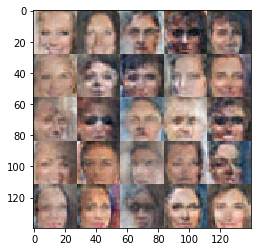

Epoch 5/5... Discriminator Loss: 0.4215... Generator Loss: 3.2767
Epoch 5/5... Discriminator Loss: 0.4960... Generator Loss: 6.1759
Epoch 5/5... Discriminator Loss: 0.3413... Generator Loss: 7.8388
Epoch 5/5... Discriminator Loss: 0.3582... Generator Loss: 4.3369
Epoch 5/5... Discriminator Loss: 0.3940... Generator Loss: 3.2692
Epoch 5/5... Discriminator Loss: 0.3651... Generator Loss: 4.7287
Epoch 5/5... Discriminator Loss: 0.3486... Generator Loss: 6.3255
Epoch 5/5... Discriminator Loss: 0.3448... Generator Loss: 9.1686
Epoch 5/5... Discriminator Loss: 0.3554... Generator Loss: 7.6038
Epoch 5/5... Discriminator Loss: 0.3400... Generator Loss: 7.1561


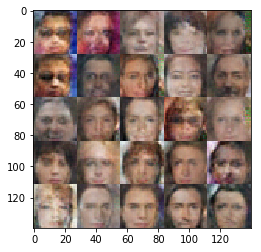

Epoch 5/5... Discriminator Loss: 0.9668... Generator Loss: 12.4701
Epoch 5/5... Discriminator Loss: 0.3434... Generator Loss: 6.5662
Epoch 5/5... Discriminator Loss: 0.6092... Generator Loss: 1.6187
Epoch 5/5... Discriminator Loss: 0.7994... Generator Loss: 7.7892
Epoch 5/5... Discriminator Loss: 0.3962... Generator Loss: 5.3511
Epoch 5/5... Discriminator Loss: 0.3421... Generator Loss: 6.2132
Epoch 5/5... Discriminator Loss: 0.3421... Generator Loss: 6.3633
Epoch 5/5... Discriminator Loss: 1.6666... Generator Loss: 6.3207
Epoch 5/5... Discriminator Loss: 0.6518... Generator Loss: 1.8110
Epoch 5/5... Discriminator Loss: 0.9921... Generator Loss: 2.8306


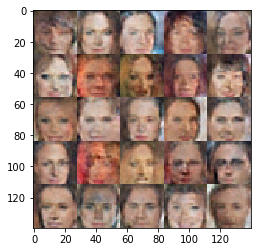

Epoch 5/5... Discriminator Loss: 0.6303... Generator Loss: 1.5530
Epoch 5/5... Discriminator Loss: 0.6790... Generator Loss: 1.4411
Epoch 5/5... Discriminator Loss: 0.6453... Generator Loss: 6.0210
Epoch 5/5... Discriminator Loss: 0.3762... Generator Loss: 4.1939
Epoch 5/5... Discriminator Loss: 0.9751... Generator Loss: 1.1033
Epoch 5/5... Discriminator Loss: 0.5603... Generator Loss: 4.6123
Epoch 5/5... Discriminator Loss: 1.2405... Generator Loss: 7.3944
Epoch 5/5... Discriminator Loss: 0.3615... Generator Loss: 4.2693
Epoch 5/5... Discriminator Loss: 0.3858... Generator Loss: 3.3636
Epoch 5/5... Discriminator Loss: 0.9527... Generator Loss: 0.9261


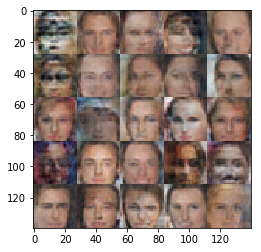

Epoch 5/5... Discriminator Loss: 0.4351... Generator Loss: 2.6406
Epoch 5/5... Discriminator Loss: 0.3875... Generator Loss: 3.8829
Epoch 5/5... Discriminator Loss: 0.3675... Generator Loss: 7.4406
Epoch 5/5... Discriminator Loss: 0.4595... Generator Loss: 4.8002
Epoch 5/5... Discriminator Loss: 0.3975... Generator Loss: 3.2733
Epoch 5/5... Discriminator Loss: 0.4595... Generator Loss: 2.4923
Epoch 5/5... Discriminator Loss: 0.3484... Generator Loss: 4.9857
Epoch 5/5... Discriminator Loss: 0.3558... Generator Loss: 4.2526
Epoch 5/5... Discriminator Loss: 0.3567... Generator Loss: 4.6971
Epoch 5/5... Discriminator Loss: 0.3414... Generator Loss: 11.7322


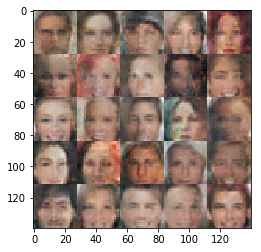

Epoch 5/5... Discriminator Loss: 0.3470... Generator Loss: 5.2412
Epoch 5/5... Discriminator Loss: 0.3928... Generator Loss: 7.3512
Epoch 5/5... Discriminator Loss: 0.8095... Generator Loss: 1.5125
Epoch 5/5... Discriminator Loss: 0.3844... Generator Loss: 3.5116
Epoch 5/5... Discriminator Loss: 0.4404... Generator Loss: 9.2636
Epoch 5/5... Discriminator Loss: 0.3730... Generator Loss: 3.6185
Epoch 5/5... Discriminator Loss: 0.6288... Generator Loss: 3.9312
Epoch 5/5... Discriminator Loss: 0.8451... Generator Loss: 3.6589
Epoch 5/5... Discriminator Loss: 0.6806... Generator Loss: 1.4139
Epoch 5/5... Discriminator Loss: 0.5184... Generator Loss: 2.0420


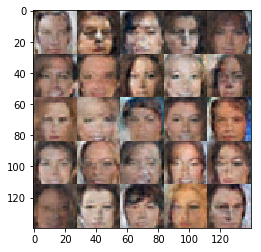

Epoch 5/5... Discriminator Loss: 0.6272... Generator Loss: 1.5584
Epoch 5/5... Discriminator Loss: 0.3689... Generator Loss: 8.1669
Epoch 5/5... Discriminator Loss: 0.3743... Generator Loss: 3.8562
Epoch 5/5... Discriminator Loss: 0.3442... Generator Loss: 8.2281
Epoch 5/5... Discriminator Loss: 0.3367... Generator Loss: 10.5868
Epoch 5/5... Discriminator Loss: 0.3397... Generator Loss: 8.7062
Epoch 5/5... Discriminator Loss: 0.3558... Generator Loss: 5.5402
Epoch 5/5... Discriminator Loss: 0.3655... Generator Loss: 5.8816
Epoch 5/5... Discriminator Loss: 0.3408... Generator Loss: 6.6558
Epoch 5/5... Discriminator Loss: 0.3789... Generator Loss: 5.4895


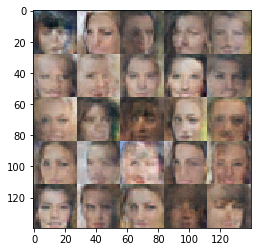

Epoch 5/5... Discriminator Loss: 0.8941... Generator Loss: 1.1416
Epoch 5/5... Discriminator Loss: 0.4258... Generator Loss: 3.1063
Epoch 5/5... Discriminator Loss: 0.5857... Generator Loss: 1.8401
Epoch 5/5... Discriminator Loss: 0.3835... Generator Loss: 6.2683
Epoch 5/5... Discriminator Loss: 0.3709... Generator Loss: 3.7492
Epoch 5/5... Discriminator Loss: 0.5202... Generator Loss: 2.0296
Epoch 5/5... Discriminator Loss: 0.5162... Generator Loss: 8.9618
Epoch 5/5... Discriminator Loss: 0.3627... Generator Loss: 9.7479
Epoch 5/5... Discriminator Loss: 0.3398... Generator Loss: 7.5410
Epoch 5/5... Discriminator Loss: 0.5128... Generator Loss: 2.3437


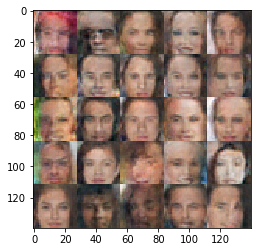

Epoch 5/5... Discriminator Loss: 0.5953... Generator Loss: 3.8591
Epoch 5/5... Discriminator Loss: 0.3710... Generator Loss: 8.1790
Epoch 5/5... Discriminator Loss: 0.3575... Generator Loss: 4.4050
Epoch 5/5... Discriminator Loss: 0.4902... Generator Loss: 2.1985
Epoch 5/5... Discriminator Loss: 0.9530... Generator Loss: 0.8762
Epoch 5/5... Discriminator Loss: 0.8448... Generator Loss: 1.1169
Epoch 5/5... Discriminator Loss: 0.4085... Generator Loss: 3.3432
Epoch 5/5... Discriminator Loss: 0.6868... Generator Loss: 1.8391
Epoch 5/5... Discriminator Loss: 0.6090... Generator Loss: 1.7308
Epoch 5/5... Discriminator Loss: 0.6530... Generator Loss: 1.6972


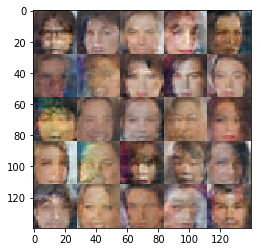

Epoch 5/5... Discriminator Loss: 0.3433... Generator Loss: 6.8666
Epoch 5/5... Discriminator Loss: 0.4227... Generator Loss: 2.8353
Epoch 5/5... Discriminator Loss: 0.3497... Generator Loss: 6.3930
Epoch 5/5... Discriminator Loss: 0.3478... Generator Loss: 7.2490
Epoch 5/5... Discriminator Loss: 0.3657... Generator Loss: 3.9864
Epoch 5/5... Discriminator Loss: 0.4230... Generator Loss: 2.8161
Epoch 5/5... Discriminator Loss: 0.4943... Generator Loss: 2.1688
Epoch 5/5... Discriminator Loss: 0.3596... Generator Loss: 4.4069
Epoch 5/5... Discriminator Loss: 0.4736... Generator Loss: 2.3266
Epoch 5/5... Discriminator Loss: 0.4085... Generator Loss: 3.0235


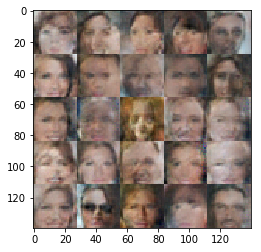

Epoch 5/5... Discriminator Loss: 2.0503... Generator Loss: 0.7037


In [12]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 5

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.